# Disease Response and Clinical Classification

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('../../curated data/RS_2020-09-04.csv')
df.head()

,STUDYID,DOMAIN,USUBJID,RSSEQ,RSTESTCD,RSTEST,RSCAT,RSSCAT,RSORRES,RSORRESU,...,RSSTRESU,RSSTAT,RSREASND,VISITNUM,VISIT,VISITDY,EPOCH,RSDY,RSSTRTPT,RSSTTPT
0,EOPNOJ,RS,8952,2,EVDFCLAS,EVDFCL-Final Classification,NaN,NaN,Non cas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN
1,EOPNOJ,RS,8952,1,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,Suspect,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN
2,EOPNOJ,RS,6013,1,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,Suspect,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN
3,EOPNOJ,RS,6013,2,EVDFCLAS,EVDFCL-Final Classification,NaN,NaN,Confirmé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN
4,EOPNOJ,RS,3816,1,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,Suspect,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN


In [29]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57782 entries, 0 to 57781
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   57782 non-null  object 
 1   DOMAIN    57782 non-null  object 
 2   USUBJID   57782 non-null  int64  
 3   RSSEQ     57782 non-null  int64  
 4   RSTESTCD  57782 non-null  object 
 5   RSTEST    57782 non-null  object 
 6   RSCAT     33240 non-null  object 
 7   RSSCAT    0 non-null      float64
 8   RSORRES   15138 non-null  object 
 9   RSORRESU  0 non-null      float64
 10  RSSTRESC  0 non-null      float64
 11  RSSTRESN  0 non-null      float64
 12  RSSTRESU  0 non-null      float64
 13  RSSTAT    42644 non-null  object 
 14  RSREASND  42644 non-null  object 
 15  VISITNUM  419 non-null    float64
 16  VISIT     0 non-null      float64
 17  VISITDY   0 non-null      float64
 18  EPOCH     57782 non-null  object 
 19  RSDY      56761 non-null  float64
 20  RSSTRTPT  37722 non-null  ob

In [30]:
15138+42644

57782

**STUDYID** : Study Identifier

**DOMAIN** : Domain Abbreviation

**USUBJID** : Unique Subject Identifier

**RSSEQ** : Observation Sequence Number

**RSTESTCD** : Test Short Name

**RSTEST** : Test Name

**RSCAT** : SubCategory for Observation => Not useful only 1 value

**RSSCAT** : SubCategory for Observation => No Values

**RSORRES** : Result or Finding in Original Units

**RSORRESU** : Test Original Units => No Values

**RSSTRESC** : Result or Finding in Standard Units, Character Format => No Values

**RSSTRESN** : Result or Finding in Standard Units, Numeric Format => No Values

**RSSTRESU** : Test Standard Units => No Values

**RSSTAT** : Completion Status

**RSREASND** : Reason Not Done

**VISITNUM** : Visit Number

**VISIT** : Visit Name => No Values

**VISITDY** : Planned Study Day of Visit => No Values

**EPOCH** : Epoch

**RSDTC** : Date/Time of Observation/Collection

**RSDY** : Study Day of Observation/Collection

**RSEVINTX** : Evaluation Interval Text

**RSSTRTPT** : Start of Observation Relative to Reference Time Point

**RSSTTPT** : Start Reference Time Point => No Values

In [31]:
len(df[df.duplicated()])

0

### Study identifier

We first look the number of records we have per study.

In [32]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EOPNOJ      301
EORKWS      419
ERFCVU    12470
ESYADD      912
EUZJTB    43680
Name: STUDYID, dtype: int64

In [33]:
sum(stdy_id_count)

57782

**EJPDEJ**, **EQJJGF** two studies present in Clinical and Adverse Events but not here. 

**ESYADD** present here not in Clinical and Adverse Events.

We then look at the number of people per study.

In [34]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EOPNOJ     147
EORKWS      17
ERFCVU    2397
ESYADD     456
EUZJTB    1875
Name: USUBJID, dtype: int64

In [35]:
sum(stdy_subid_count)

4892

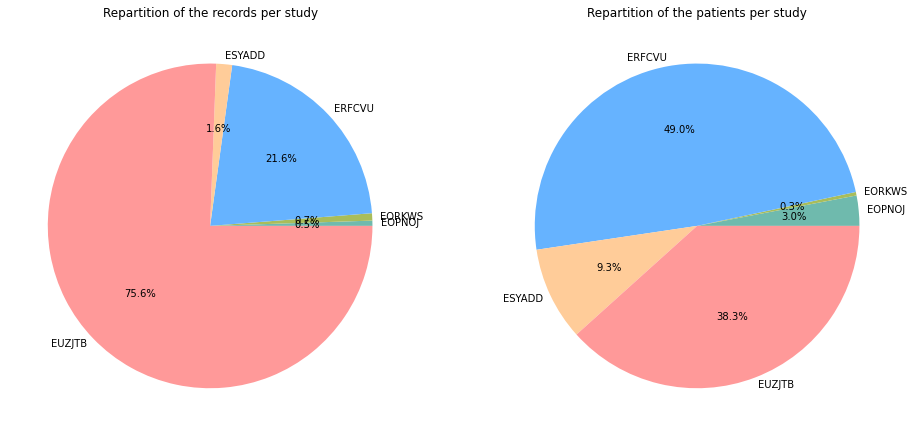

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax1.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

ax1.set_title("Repartition of the records per study")


ax2.pie(stdy_subid_count.values, labeldistance=1.05, colors=colors, labels=stdy_subid_count.index, autopct='%1.1f%%',
          startangle=0)

ax2.set_title("Repartition of the patients per study")

plt.show()

###  Unique Subject Identifier

In [37]:
df['USUBJID'].value_counts()

5961    296
1225    182
2482    178
8968    174
7530    150
       ... 
6309      1
7407      1
1107      1
2076      1
3281      1
Name: USUBJID, Length: 4892, dtype: int64

In [38]:
df[df['USUBJID'] == 5961]

,STUDYID,DOMAIN,USUBJID,RSSEQ,RSTESTCD,RSTEST,RSCAT,RSSCAT,RSORRES,RSORRESU,...,RSSTRESU,RSSTAT,RSREASND,VISITNUM,VISIT,VISITDY,EPOCH,RSDY,RSSTRTPT,RSSTTPT
21868,EUZJTB,RS,5961,36,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,6.0,DURING,NaN
21869,EUZJTB,RS,5961,158,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,27.0,DURING,NaN
21870,EUZJTB,RS,5961,73,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,13.0,DURING,NaN
21871,EUZJTB,RS,5961,134,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,23.0,DURING,NaN
21872,EUZJTB,RS,5961,127,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,22.0,DURING,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22159,EUZJTB,RS,5961,74,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,13.0,DURING,NaN
22160,EUZJTB,RS,5961,217,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,37.0,DURING,NaN
22161,EUZJTB,RS,5961,26,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,5.0,DURING,NaN
22162,EUZJTB,RS,5961,76,EVDNCLAS,EVDNCL-Notification Classification,NaN,NaN,NaN,NaN,...,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,TREATMENT,13.0,DURING,NaN


In [39]:
df[df['USUBJID'] == 5961]['RSSTAT'].value_counts()

NOT DONE    291
Name: RSSTAT, dtype: int64

### Test Short Name

In [40]:
df['RSTESTCD'].value_counts()

AVPU0101    33240
EVDNCLAS    21987
EVDFCLAS     2555
Name: RSTESTCD, dtype: int64

### Test Name

In [41]:
df['RSTEST'].value_counts()

AVPU01-Responsiveness                 32328
EVDNCL-Notification Classification    21987
EVDFCL-Final Classification            2555
AVPU0101 - Responsiveness               912
Name: RSTEST, dtype: int64

There is a typo. We correct it. 

In [42]:
def correct_type(row):
    if row.RSTEST == 'AVPU0101 - Responsiveness':
        return 'AVPU01-Responsiveness'
    else:
        return row.RSTEST

In [43]:
df['RSTEST'] = df.apply(correct_type,axis = 1)
df['RSTEST'].value_counts()

AVPU01-Responsiveness                 33240
EVDNCL-Notification Classification    21987
EVDFCL-Final Classification            2555
Name: RSTEST, dtype: int64

### SubCategory for Observation

In [44]:
df['RSCAT'].value_counts()

AVPU    33240
Name: RSCAT, dtype: int64

### Result or Finding in Original Units

In [45]:
df['RSORRES'].value_counts()

Alert                      10368
OTHER                       1940
Highly Suspected             466
EBOLA                        464
Confirmed                    433
Suspected                    413
Verbal stimulus              267
Suspect                      146
Physical stimulus            141
Confirmé                      76
U                             74
Unconscious                   62
Non cas                       62
Verbal                        37
Verbal stimuli                37
A                             34
Painful                       31
Unresponsive                  27
PROBABLE EBOLA                13
V                              8
Doa                            7
Alert/Verbal/Painful           7
Painful stimuli                6
Vip                            6
P                              5
Très suspect (Probable)        4
Pas de réponse                 3
Alert/Verbal                   1
Name: RSORRES, dtype: int64

In [46]:
len(df['RSORRES'].value_counts())

28

We need to harmonize this feature. 

The basis of the **AVPU** scale is on the following criterion:

- Alert: The patient is aware of the examiner and can respond to the environment around them on their own. The patient can also follow commands, open their eyes spontaneously, and track objects.

- Verbally Responsive: The patient's eyes do not open spontaneously. The patient's eyes open only in response to a verbal stimulus directed toward them. The patient is able to react to that verbal stimulus directly and in a meaningful way.

- Painfully Responsive: The patient's eyes do not open spontaneously. The patient will only respond to the application of painful stimuli by an examiner. The patient may move, moan, or cry out directly in response to the painful stimuli.

- Unresponsive: The patient does not respond spontaneously. The patient does not respond to verbal or painful stimuli.

In [47]:
dict_apvu = {'Alert': 'Alert', 'Physical stimulus' : 'Physical stimulus', 'Verbal stimulus' : 'Verbal stimulus', 
             'Unresponsive' : 'Unresponsive','U' : 'Unresponsive', 'Unconscious' : 'Unresponsive', 
             'Verbal': 'Verbal stimulus', 'Verbal stimuli' : 'Verbal stimulus', 'A' :'Alert', 'Painful' : 'Physical stimulus',
            'V' : 'Verbal stimulus', 'Painful stimuli' : 'Physical stimulus', 'P' : 'Physical stimulus',
            'Pas de réponse' : 'Unresponsive', 'Alert/Verbal' : 'Alert', 'Alert/Verbal/Painful' : 'Alert'}

def correct_apvu(x):
    if pd.isna(x) :
        return x
    else: 
        return dict_apvu[x]

df.loc[df['RSTEST'] == 'AVPU01-Responsiveness', 'RSORRES'] = df.loc[df['RSTEST'] == 'AVPU01-Responsiveness', 'RSORRES'].apply(lambda x : correct_apvu(x))

In [48]:
dict_final_class = {'OTHER' : 'Other', 'EBOLA' : 'Ebola', 'Confirmé' : 'Ebola', 'Non cas' : 'Other', 'PROBABLE EBOLA' : 'Ebola'}

def correct_fclass(x):
    if pd.isna(x) :
        return x
    else: 
        return dict_final_class[x]

df.loc[df['RSTEST'] == 'EVDFCL-Final Classification', 'RSORRES'] = df.loc[df['RSTEST'] == 'EVDFCL-Final Classification', 'RSORRES'].apply(lambda x : correct_fclass(x))

In [49]:
dict_notif_class = {'Highly Suspected' : 'Highly Suspected', 'Confirmed' : 'Confirmed', 'Suspected' : 'Suspected',
                    'Suspect' : 'Suspected', 'Doa': 'Dead on arrival', 'Vip': 'Information and Prevention Visit',
                   'Très suspect (Probable)' : 'Highly Suspected'}

def correct_notif_class(x):
    if pd.isna(x) :
        return x
    else: 
        return dict_notif_class[x]

df.loc[df['RSTEST'] == 'EVDNCL-Notification Classification', 'RSORRES'] = df.loc[df['RSTEST'] == 'EVDNCL-Notification Classification', 'RSORRES'].apply(lambda x : correct_notif_class(x))

In [50]:
df.groupby(['RSTEST']).RSORRES.value_counts()

RSTEST                              RSORRES                         
AVPU01-Responsiveness               Alert                               10410
                                    Verbal stimulus                       349
                                    Physical stimulus                     183
                                    Unresponsive                          166
EVDFCL-Final Classification         Other                                2002
                                    Ebola                                 553
EVDNCL-Notification Classification  Suspected                             559
                                    Highly Suspected                      470
                                    Confirmed                             433
                                    Dead on arrival                         7
                                    Information and Prevention Visit        6
Name: RSORRES, dtype: int64

In [51]:
len(df['RSORRES'].value_counts())

11

In [52]:
df[df['RSTEST'] == 'EVDFCL-Final Classification'].groupby('USUBJID').RSORRES.nunique().sort_values(ascending = False)

USUBJID
2847    2
7608    2
5672    2
7168    2
4455    2
       ..
6273    1
6272    1
6268    1
6266    1
2       1
Name: RSORRES, Length: 2528, dtype: int64

Some patients may have several final classification.

In [53]:
df[df['USUBJID'] == 2847]

,STUDYID,DOMAIN,USUBJID,RSSEQ,RSTESTCD,RSTEST,RSCAT,RSSCAT,RSORRES,RSORRESU,...,RSSTRESU,RSSTAT,RSREASND,VISITNUM,VISIT,VISITDY,EPOCH,RSDY,RSSTRTPT,RSSTTPT
2419,ERFCVU,RS,2847,13,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,19.0,NaN,NaN
2420,ERFCVU,RS,2847,15,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,21.0,NaN,NaN
2421,ERFCVU,RS,2847,16,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,22.0,NaN,NaN
2422,ERFCVU,RS,2847,5,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,12.0,NaN,NaN
2423,ERFCVU,RS,2847,21,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,28.0,NaN,NaN
2424,ERFCVU,RS,2847,10,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,16.0,NaN,NaN
2425,ERFCVU,RS,2847,6,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,13.0,NaN,NaN
2426,ERFCVU,RS,2847,19,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,25.0,NaN,NaN
2427,ERFCVU,RS,2847,22,EVDFCLAS,EVDFCL-Final Classification,NaN,NaN,Ebola,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,29.0,NaN,NaN
2428,ERFCVU,RS,2847,11,AVPU0101,AVPU01-Responsiveness,AVPU,NaN,Alert,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TREATMENT,17.0,NaN,NaN


### Completion Status

In [54]:
df['RSSTAT'].value_counts()

NOT DONE    42644
Name: RSSTAT, dtype: int64

In [55]:
df.groupby(['RSTEST','RSSTAT']).RSORRES.value_counts()

Series([], Name: RSORRES, dtype: int64)

If RSTEST is filled RSSTAT is empty.

In [56]:
df['RSSTAT'].fillna('DONE', inplace = True)
df['RSSTAT'].value_counts()

NOT DONE    42644
DONE        15138
Name: RSSTAT, dtype: int64

In [57]:
df[df['RSSTAT'] == 'DONE'].groupby('USUBJID').RSTEST.count().sort_values(ascending = False)

USUBJID
2385    71
1780    71
4472    63
101     62
6010    61
        ..
4361     1
7714     1
4357     1
4354     1
4762     1
Name: RSTEST, Length: 4272, dtype: int64